<a href="https://colab.research.google.com/github/KeshavAman/Brain-Tumor-Prediction-using-Machine-Learning/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import plotting

**Importing dataset**

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/KeshavAman/file/main/Brain%20Tumor.csv')
dataset.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [3]:
print('Rows and columns :',dataset.shape)

Rows and columns : (3762, 15)


In [4]:
dataset.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


**Checking and Dropping null values**

In [6]:
dataset.isnull().sum()

Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

**Value Count**

In [7]:
dataset['Class'].value_counts()

0    2079
1    1683
Name: Class, dtype: int64

**Visualize the value count**

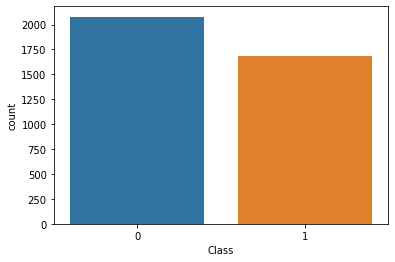

In [8]:
sns.countplot(dataset['Class'],label = 'count')

**Pairplot**

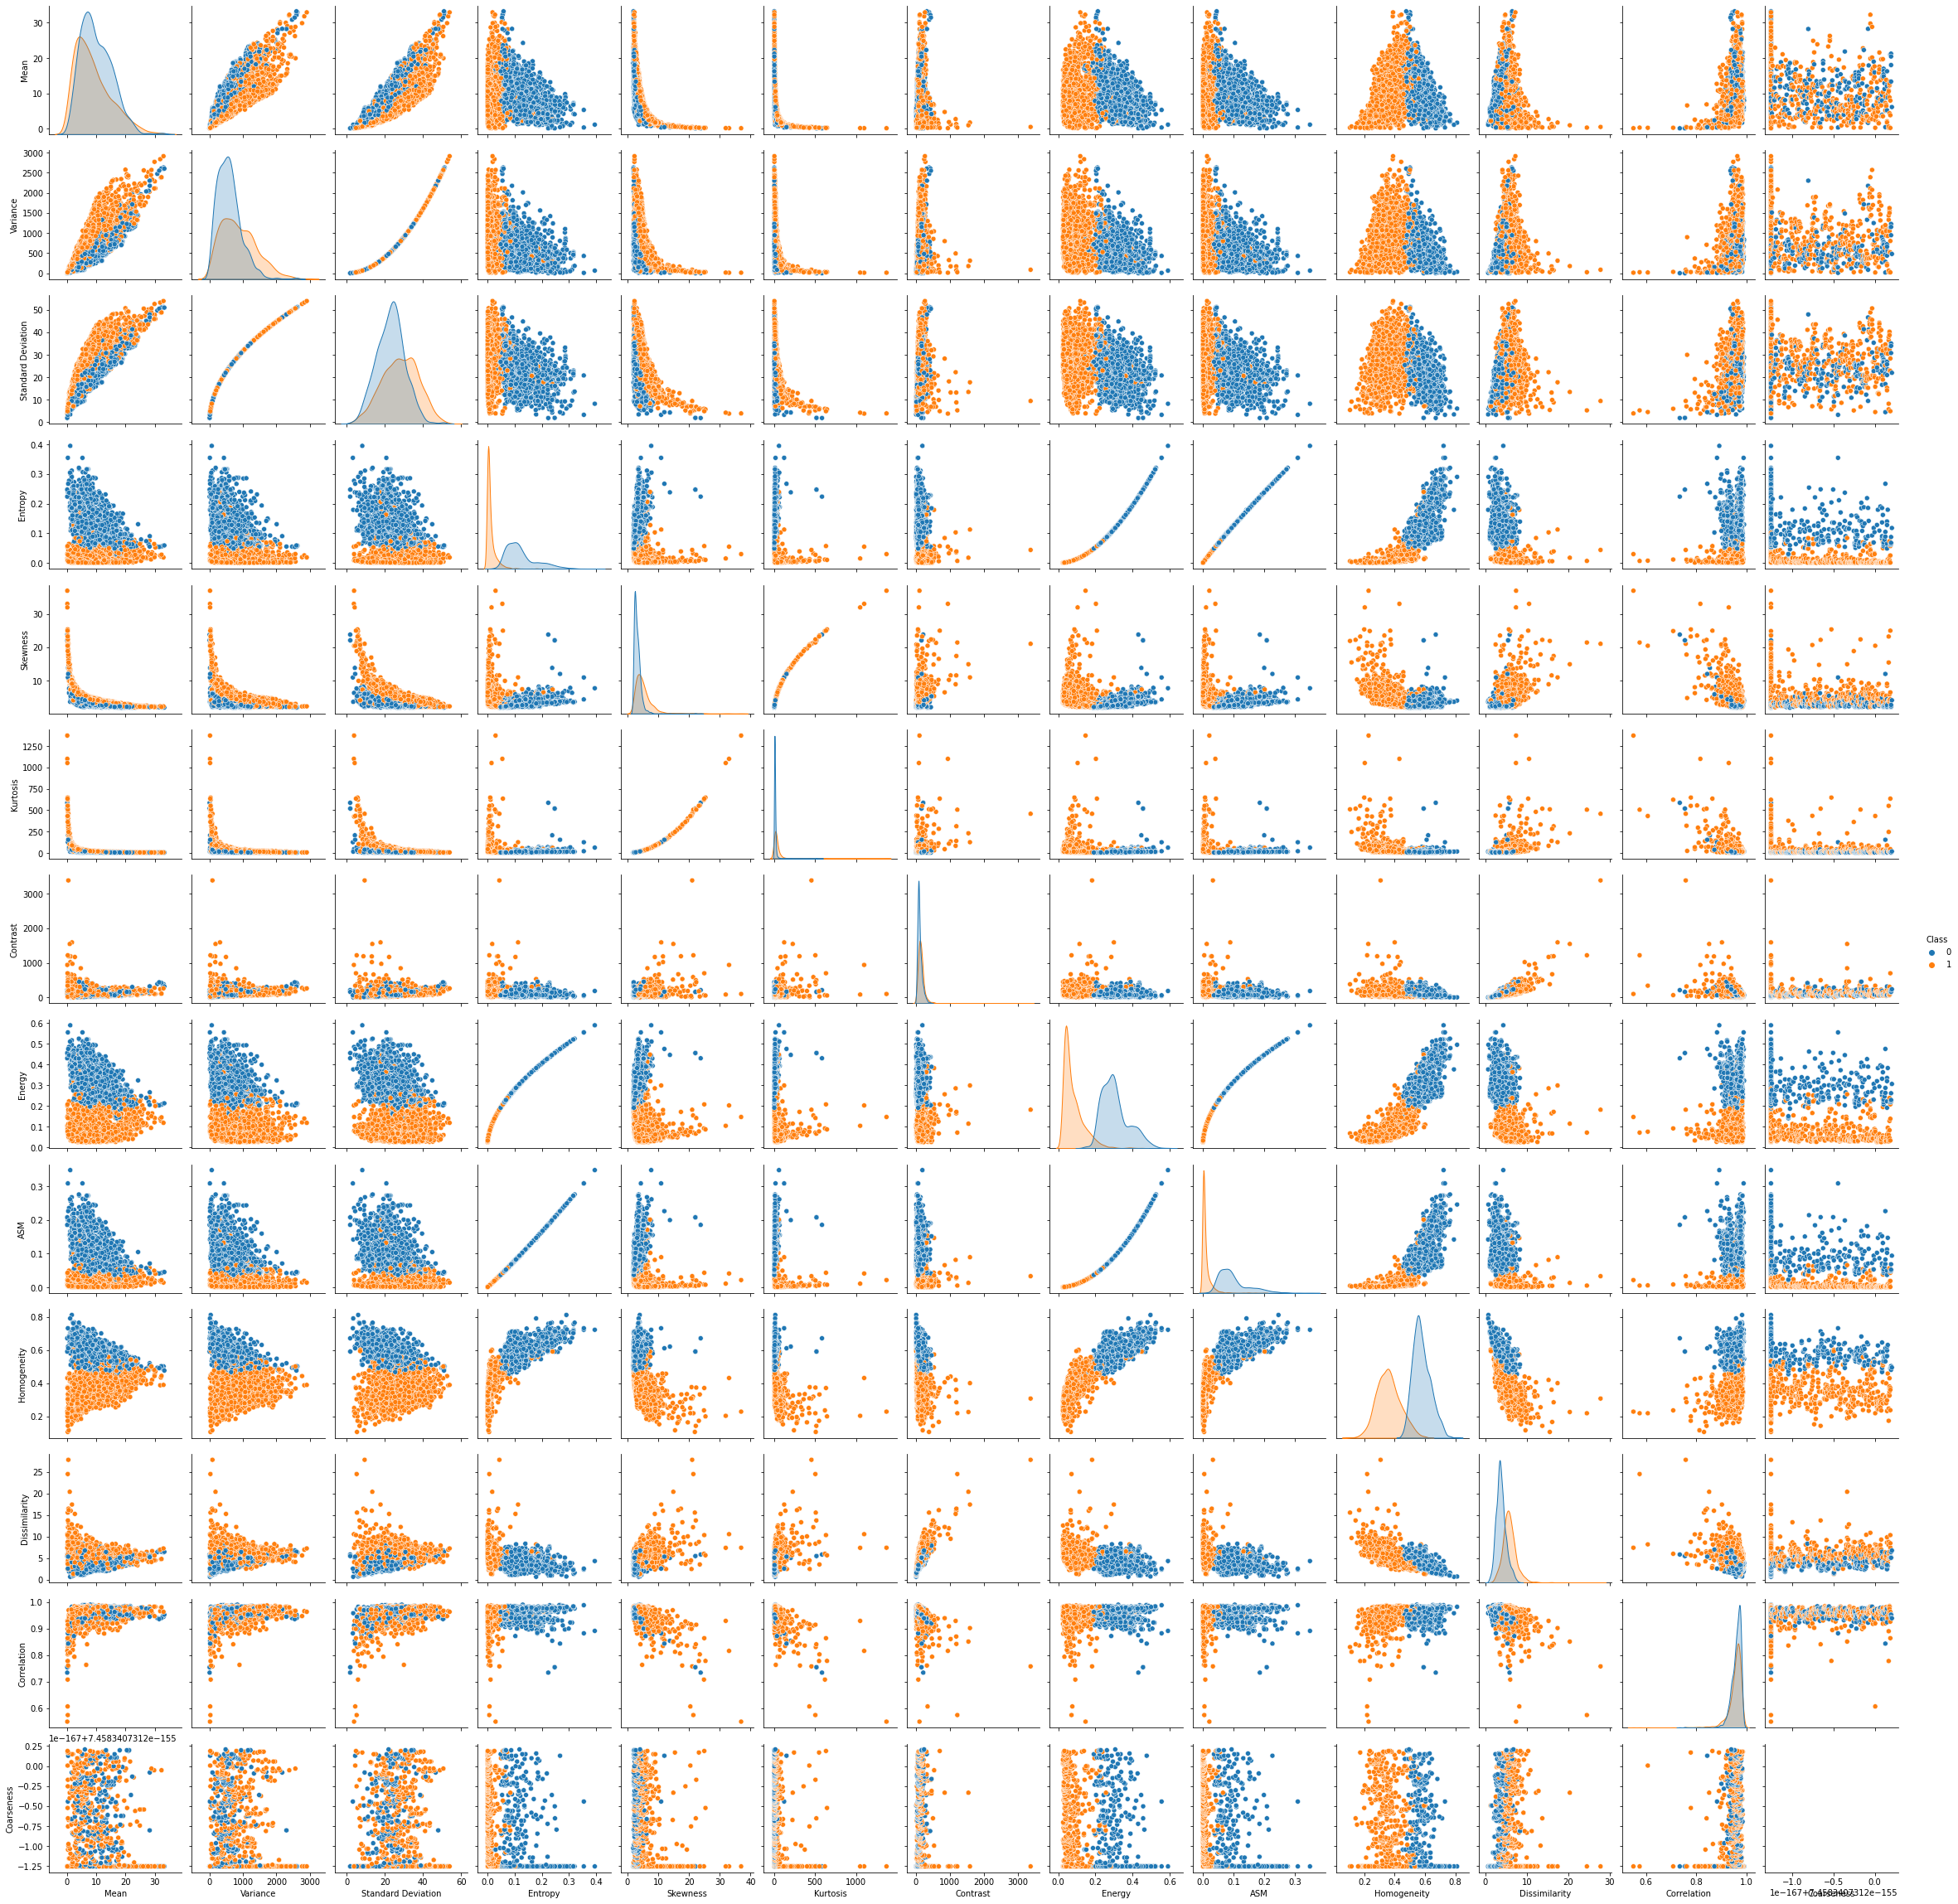

In [9]:
import warnings
warnings.filterwarnings('ignore')

sns.pairplot(dataset, hue = 'Class')

**Heatmap**

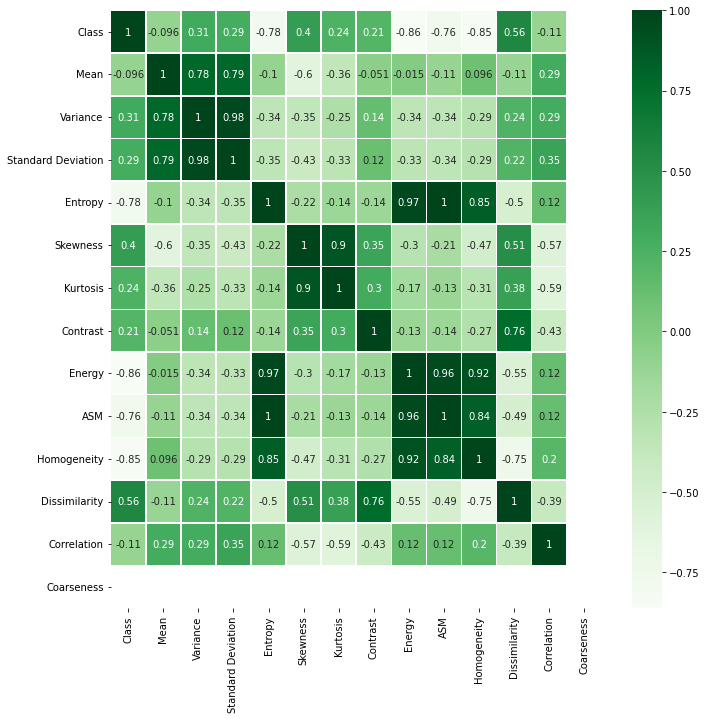

In [10]:
plt.figure(figsize = (11,11))
sns.heatmap(dataset.corr(), annot = True,linewidths=0.5,cmap='Greens')
plt.show()

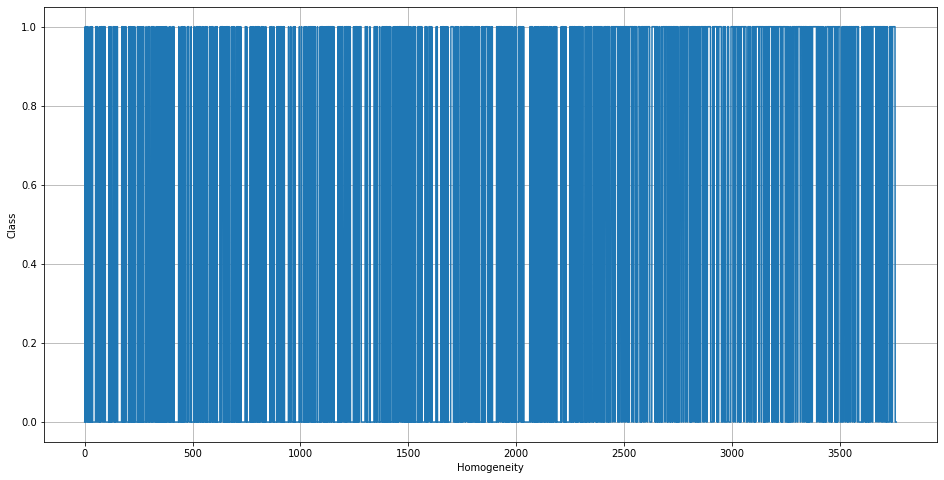

In [13]:
plt.figure(figsize = (16,8))

plt.grid(True)
plt.xlabel('Homogeneity')
plt.ylabel('Class')
plt.plot(dataset['Class'])
plt.show()

**Barplot Class vs Mean**

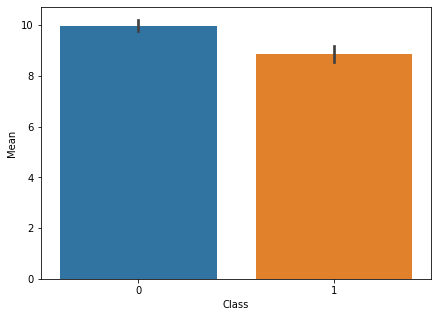

In [18]:
fig = plt.figure(figsize = (7,5))
sns.barplot(data = dataset, x= 'Class', y='Mean')

**Barplot Class vs Variance**

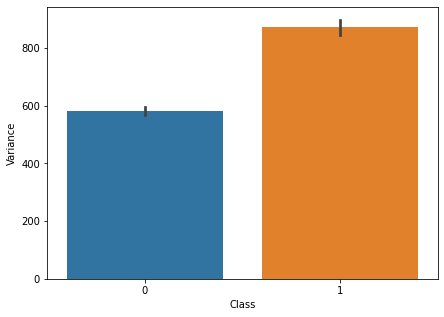

In [19]:
fig = plt.figure(figsize = (7,5))
sns.barplot(data = dataset, x= 'Class', y='Variance')

**Displot Energy vs Class**

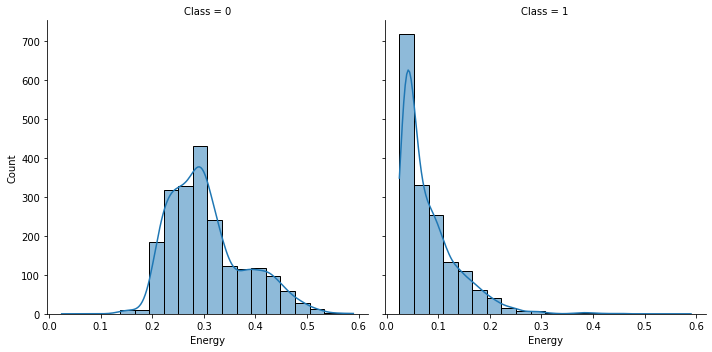

In [21]:
sns.displot(dataset, x = 'Energy', col = 'Class', kde = True)

**Displot Dissimilarity vs Class**

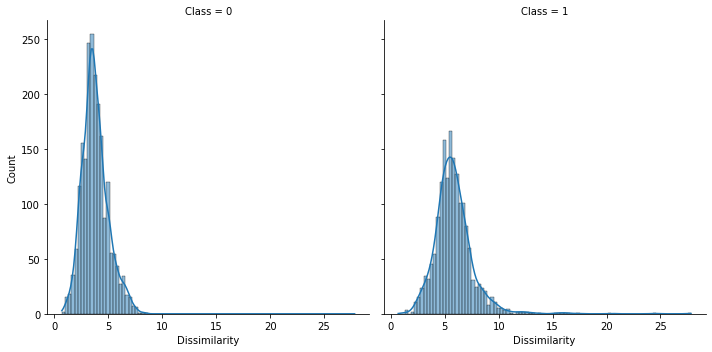

In [23]:
sns.displot(dataset, x = 'Dissimilarity', col = 'Class', kde = True)

**Splitting of dataset**

In [29]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:,2:15].values
y = dataset.iloc[:,1].values
X_train, X_test, y_train, y_test = train_test_split( X, Y ,test_size = 0.10, random_state = 0)

**Preprocessing of dataset**

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Dimensions**

In [31]:
print("X_train shape : ",X_train.shape)
print("X_test shape : ",X_test.shape)
print("Y_train shape : ",y_train.shape)
print("Y_test shape : ",y_test.shape)

X_train shape :  (3385, 13)
X_test shape :  (377, 13)
Y_train shape :  (3385,)
Y_test shape :  (377,)


**Using KNN**

In [32]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

print('Accuracy score : ',accuracy_score(y_test, y_pred)*100)
print('Precision Score : ',precision_score(y_test, y_pred)*100)
print('Recall Score : ',recall_score(y_test, y_pred)*100)
print('F1 score : ',f1_score(y_test, y_pred)*100)
print('Confusion Matrix: ',confusion_matrix(y_test,y_pred), sep = '\n')

Accuracy score :  97.87798408488064
Precision Score :  100.0
Recall Score :  95.53072625698324
F1 score :  97.71428571428572
Confusion Matrix: 
[[198   0]
 [  8 171]]


**Using Linear Regression**

In [36]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

print('Accuracy score : ',accuracy_score(y_test, y_pred)*100)
print('Precision Score : ',precision_score(y_test, y_pred)*100)
print('Recall Score : ',recall_score(y_test, y_pred)*100)
print('F1 score : ',f1_score(y_test, y_pred)*100)
print('Confusion Matrix: ',confusion_matrix(y_test,y_pred), sep = '\n')

Accuracy score :  97.08222811671088
Precision Score :  98.83720930232558
Recall Score :  94.97206703910615
F1 score :  96.86609686609687
Confusion Matrix: 
[[196   2]
 [  9 170]]


**Using Support Vector Classifier (Linear SVC)**

In [38]:
from sklearn.svm import SVC, LinearSVC

SVM = LinearSVC()
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

print('Accuracy score : ',accuracy_score(y_test, y_pred)*100)
print('Precision Score : ',precision_score(y_test, y_pred)*100)
print('Recall Score : ',recall_score(y_test, y_pred)*100)
print('F1 score : ',f1_score(y_test, y_pred)*100)
print('Confusion Matrix: ',confusion_matrix(y_test,y_pred), sep = '\n')

Accuracy score :  97.87798408488064
Precision Score :  99.42196531791907
Recall Score :  96.08938547486034
F1 score :  97.72727272727273
Confusion Matrix: 
[[197   1]
 [  7 172]]


**Using Random Forest**

In [40]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=200)
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

print('Accuracy score : ',accuracy_score(y_test, y_pred)*100)
print('Precision Score : ',precision_score(y_test, y_pred)*100)
print('Recall Score : ',recall_score(y_test, y_pred)*100)
print('F1 score : ',f1_score(y_test, y_pred)*100)
print('Confusion Matrix: ',confusion_matrix(y_test,y_pred), sep = '\n')

Accuracy score :  98.6737400530504
Precision Score :  99.43181818181817
Recall Score :  97.76536312849163
F1 score :  98.59154929577464
Confusion Matrix: 
[[197   1]
 [  4 175]]


Using Decision Tree**

In [42]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

print('Accuracy score : ',accuracy_score(y_test, y_pred)*100)
print('Precision Score : ',precision_score(y_test, y_pred)*100)
print('Recall Score : ',recall_score(y_test, y_pred)*100)
print('F1 score : ',f1_score(y_test, y_pred)*100)
print('Confusion Matrix: ',confusion_matrix(y_test,y_pred), sep = '\n')

Accuracy score :  97.61273209549071
Precision Score :  97.75280898876404
Recall Score :  97.20670391061452
F1 score :  97.47899159663864
Confusion Matrix: 
[[194   4]
 [  5 174]]


**Using Support Vector Classifier**

In [44]:
from sklearn.svm import SVC

SVC = SVC()
SVC.fit(X_train, y_train)
y_pred = SVC.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

print('Accuracy score : ',accuracy_score(y_test, y_pred)*100)
print('Precision Score : ',precision_score(y_test, y_pred)*100)
print('Recall Score : ',recall_score(y_test, y_pred)*100)
print('F1 score : ',f1_score(y_test, y_pred)*100)
print('Confusion Matrix: ',confusion_matrix(y_test,y_pred), sep = '\n')

Accuracy score :  97.87798408488064
Precision Score :  99.42196531791907
Recall Score :  96.08938547486034
F1 score :  97.72727272727273
Confusion Matrix: 
[[197   1]
 [  7 172]]


**Using Naive Bayes**

In [47]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

print('Accuracy score : ',accuracy_score(y_test, y_pred)*100)
print('Precision Score : ',precision_score(y_test, y_pred)*100)
print('Recall Score : ',recall_score(y_test, y_pred)*100)
print('F1 score : ',f1_score(y_test, y_pred)*100)
print('Confusion Matrix: ',confusion_matrix(y_test,y_pred), sep = '\n')

Accuracy score :  96.55172413793103
Precision Score :  99.40476190476191
Recall Score :  93.29608938547486
F1 score :  96.25360230547551
Confusion Matrix: 
[[197   1]
 [ 12 167]]
